# ICR - Identify Age Related Conditions

## Introduction
This project is inspired by the kaggle project of the same title - ICR Identify Age Related Conditions

https://www.kaggle.com/competitions/icr-identify-age-related-conditions/overview

#### Goal of the Competition
The goal of this competition is to predict if a person has any of three medical conditions. You are being asked to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0). You will create a model trained on measurements of health characteristics.

To determine if someone has these medical conditions requires a long and intrusive process to collect information from patients. With predictive models, we can shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

Your work will help researchers discover the relationship between measurements of certain characteristics and potential patient conditions.

#### Context
They say age is just a number but a whole host of health issues come with aging. From heart disease and dementia to hearing loss and arthritis, aging is a risk factor for numerous diseases and complications. The growing field of bioinformatics includes research into interventions that can help slow and reverse biological aging and prevent major age-related ailments. Data science could have a role to play in developing new methods to solve problems with diverse data, even if the number of samples is small.

Currently, models like XGBoost and random forest are used to predict medical conditions yet the models' performance is not good enough. Dealing with critical problems where lives are on the line, models need to make correct predictions reliably and consistently between different cases.

Founded in 2015, competition host InVitro Cell Research, LLC (ICR) is a privately funded company focused on regenerative and preventive personalized medicine. Their offices and labs in the greater New York City area offer state-of-the-art research space. InVitro Cell Research's Scientists are what set them apart, helping guide and defining their mission of researching how to repair aging people fast.

In this competition, you’ll work with measurements of health characteristic data to solve critical problems in bioinformatics. Based on minimal training, you’ll create a model to predict if a person has any of three medical conditions, with an aim to improve on existing methods.

You could help advance the growing field of bioinformatics and explore new methods to solve complex problems with diverse data.

### Data
#### Files and Field Descriptions
- **train.csv** - The training set.
    - Id Unique identifier for each observation.
    - AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
    - Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.

- **test.csv** - The test set. Your goal is to predict the probability that a subject in this set belongs to each of the two classes.
- **greeks.csv** - Supplemental metadata, only available for the training set.
    - Alpha Identifies the type of age-related condition, if present.
        - A No age-related condition. Corresponds to class 0.
        - B, D, G The three age-related conditions. Correspond to class 1.
    - Beta, Gamma, Delta Three experimental characteristics.
    - Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

- **sample_submission.csv** - A sample submission file in the correct format. See the Evaluation page for more details.

# 1. EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
#Read the data
df = pd.read_csv('greeks.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(df.shape)
df.head()

(617, 6)


,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [5]:
print(train.shape)
train.head()

(617, 58)


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [6]:
#Check the balance of the train dataset
train['Class'].value_counts(normalize=True)

0    0.824959
1    0.175041
Name: Class, dtype: float64

This is a dataset with imbalanced "Class", with 82.5% of the classes representing "0" and 17.5% representing our class to be predicted "1".

Imbalanced class best practices: 

https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38#:~:text=Some%20models%20I%20would%20recommend,class%20at%20each%20successive%20iteration.

Solving the Class Imbalance Problem:

https://towardsdatascience.com/solving-the-class-imbalance-problem-58cb926b5a0f#:~:text=Resampling%20is%20a%20common%20technique,examples%20from%20the%20original%20dataset.


In [7]:
train["EJ"].unique()

array(['B', 'A'], dtype=object)

In [8]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [9]:
#Check for null values in dataset
train.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [10]:
#Filling up the null values with mean
train['BQ'].fillna(train['BQ'].mean(), inplace=True)
train['CB'].fillna(train['CB'].mean(), inplace=True)
train['CC'].fillna(train['CC'].mean(), inplace=True)
train['DU'].fillna(train['DU'].mean(), inplace=True)
train['EL'].fillna(train['EL'].mean(), inplace=True)
train['FC'].fillna(train['FC'].mean(), inplace=True)
train['FL'].fillna(train['FL'].mean(), inplace=True)
train['FS'].fillna(train['FS'].mean(), inplace=True)
train['FS'].fillna(train['FS'].mean(), inplace=True)
train['GL'].fillna(train['GL'].mean(), inplace=True)
train.isnull().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [11]:
train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [12]:
df

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [13]:
df.isnull().sum()

Id         0
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
dtype: int64

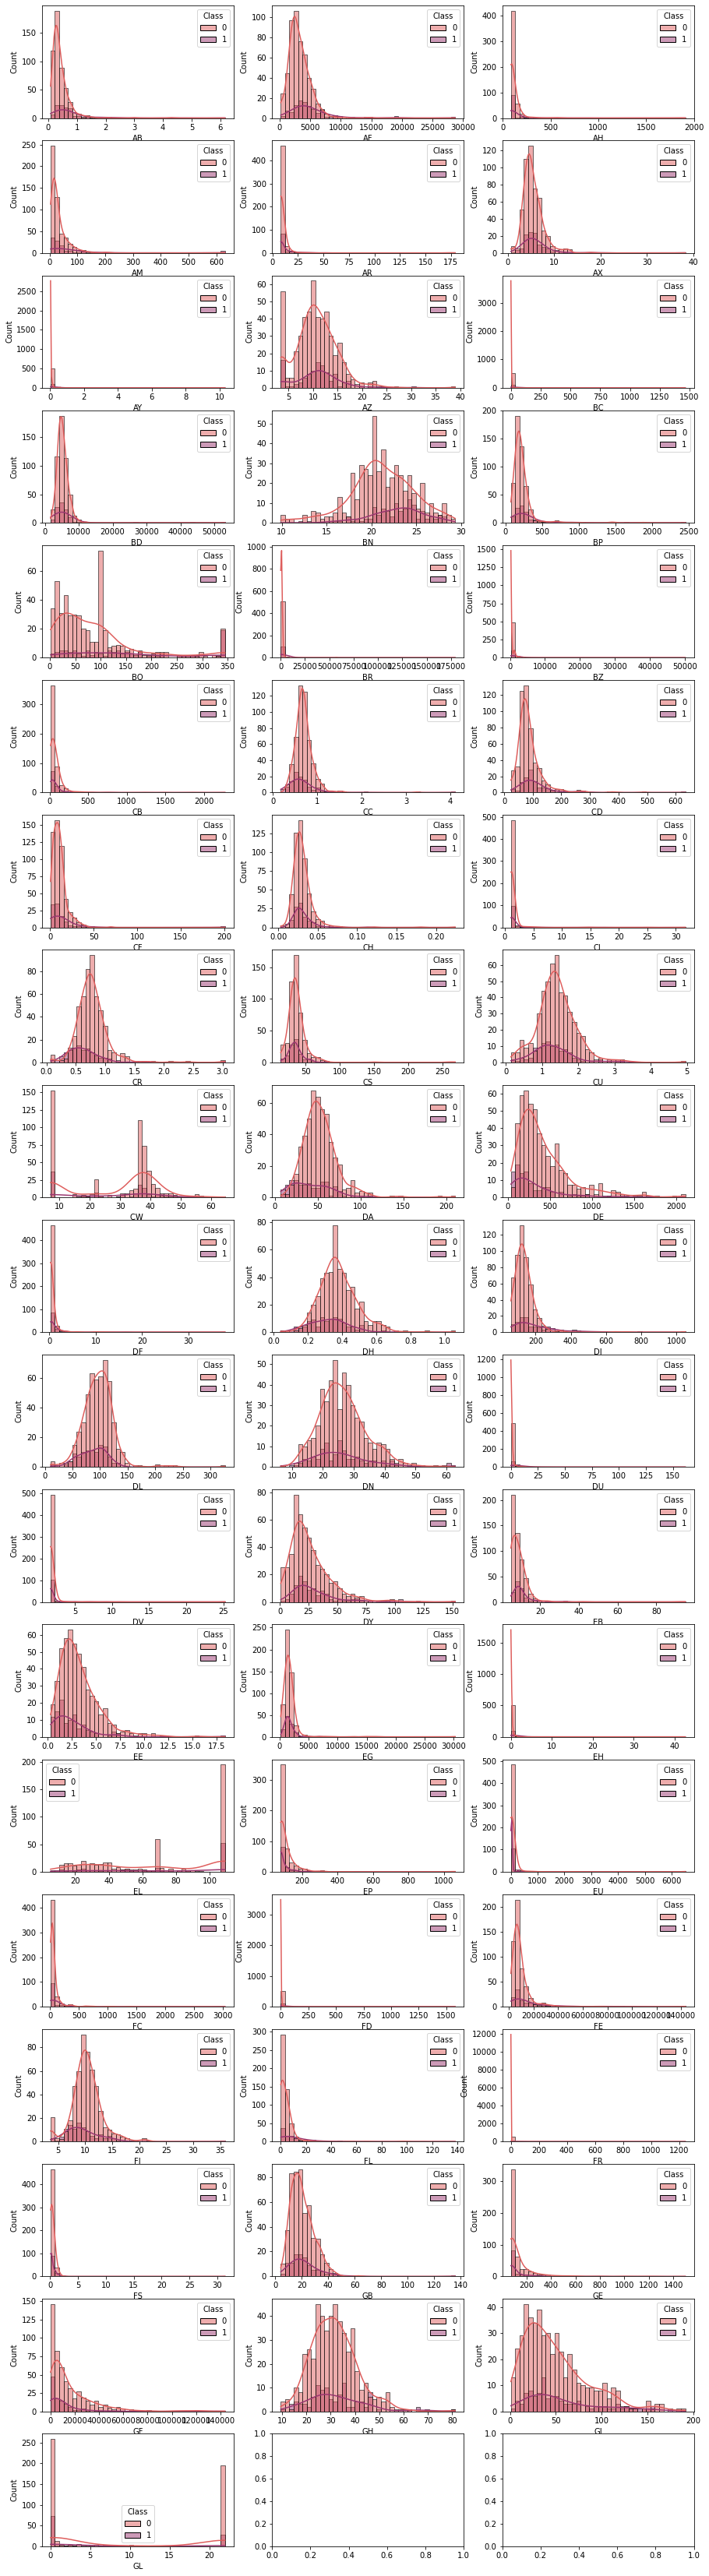

In [14]:
feature = [i for i in train.columns if i != "EJ" and i != "Class" and i != "Id"]

fig, ax = plt.subplots(19, 3, figsize=(15, 60))
for i in range(len(feature)):
    plt.subplot(19,3,i+1)
    sns.histplot(data = train, x=feature[i],hue="Class",bins=40,kde=True,palette="flare")
    

plt.show()



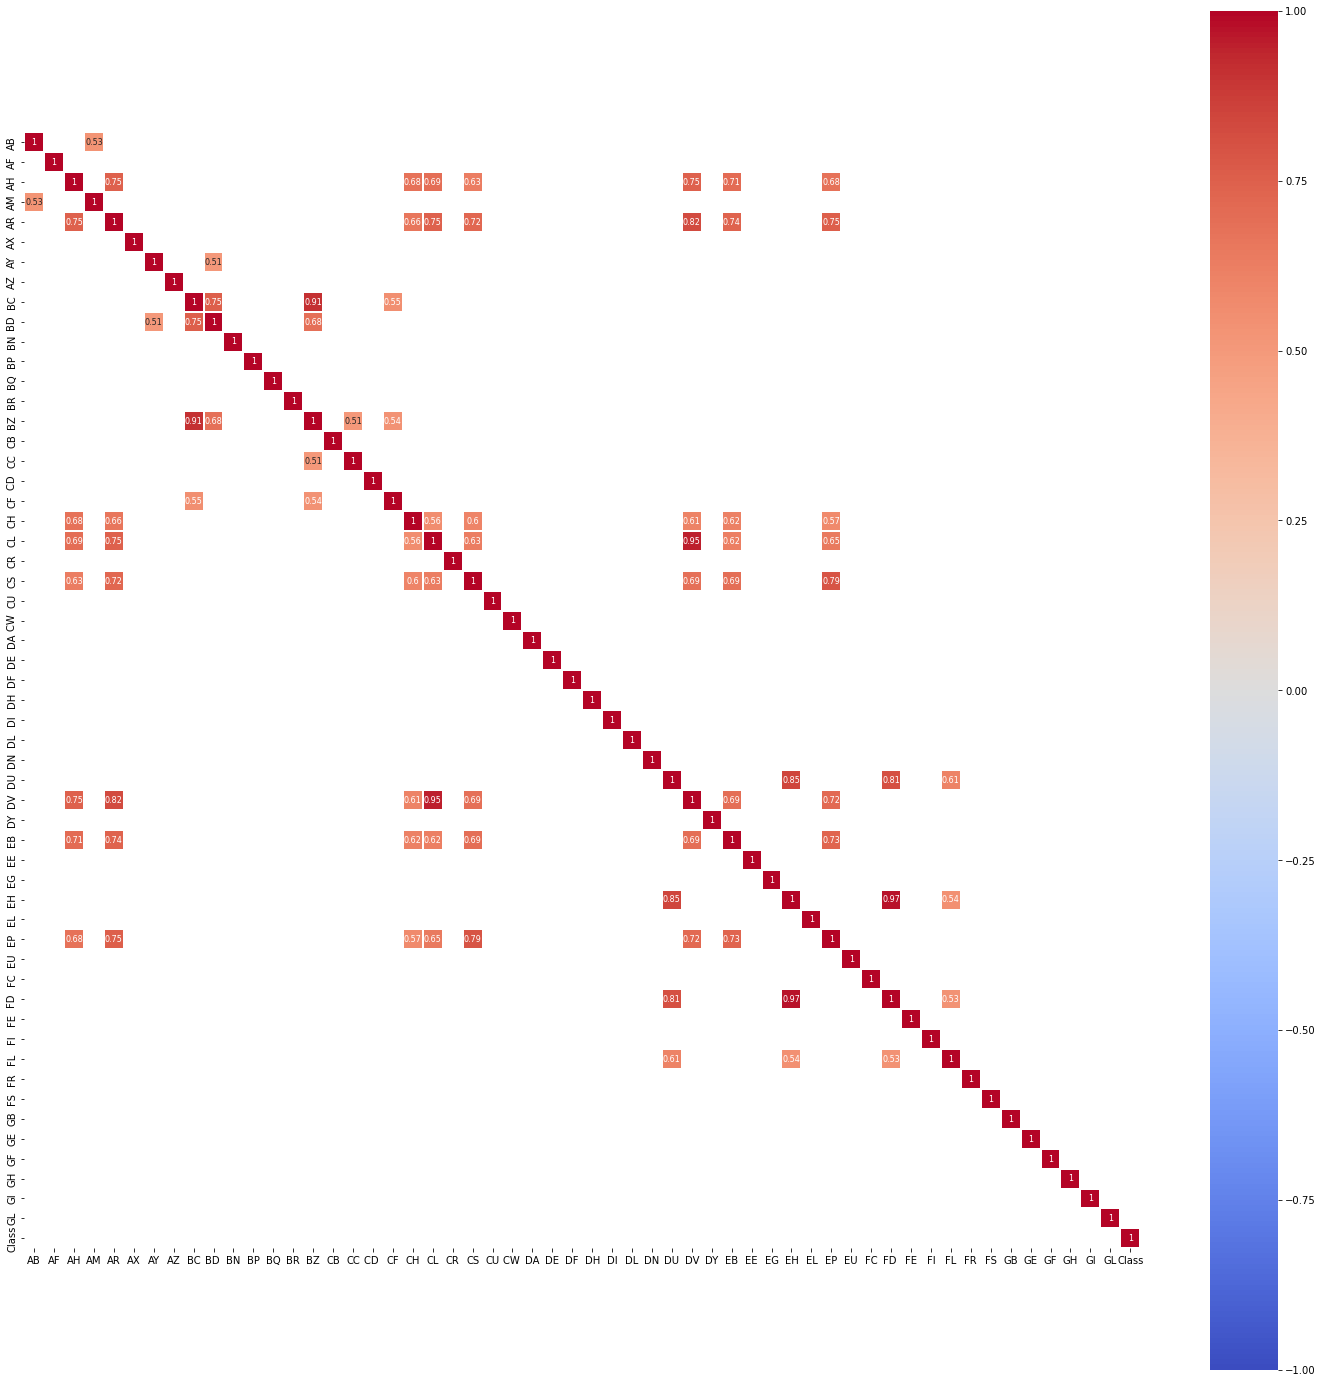

In [34]:
# Create a heatmap between all variables
corr = train.corr()
#Plot a heatmap with correlation absolute values > 0.5
plt.figure(figsize=(25,25))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);



The heatmap seems like so because it is created only with features with a absolute correlation of above 0.5 with the "Class", which is none of the features.

*note* An absolute correlation of above 0.5 signify statistical significance between two features.

In [ ]:
sns.pairplot(train, hue = "")

# 2. Models

In [17]:
#import classification libraries
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE


In [18]:
num_cols = test.select_dtypes(include=['float64']).columns.tolist()
cat_cols = test.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Id')

FEATURES = num_cols + cat_cols

In [19]:
#Encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cat_df = pd.DataFrame(encoder.fit_transform(train[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

#Scale the numerical columns
scaler = StandardScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(train[num_cols]), columns=num_cols)

model_train = pd.concat([scaled_num_df, encoded_cat_df], axis=1)


In [20]:
#split our train datset to train and test
X = model_train
y = train["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Random forest Model
We will start with Random Forest Model

In [22]:
#A function to fit and evaluate the model
def model_eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    #Visualize confusion matrix, classification report and roc_auc curve
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax[0], cmap = 'YlOrRd')
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    ax[1].plot(fpr, tpr, color='b', lw=2, label='AUC = %0.2f' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'AUC-ROC Curve')
    ax[1].legend(loc='lower right')

    # Print evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}')

    ax[2].bar(['0', '1'], [roc_auc, 0.5])
    ax[2].set_title('ROC AUC Score')
    ax[2].set_ylabel('ROC AUC')
    plt.tight_layout()
    plt.show()
    

In [23]:
rf =RandomForestClassifier(random_state=42)

Accuracy: 0.9597
Precision: 0.9091
Recall: 0.8696
F1-score: 0.8889
AUC-ROC: 0.9742


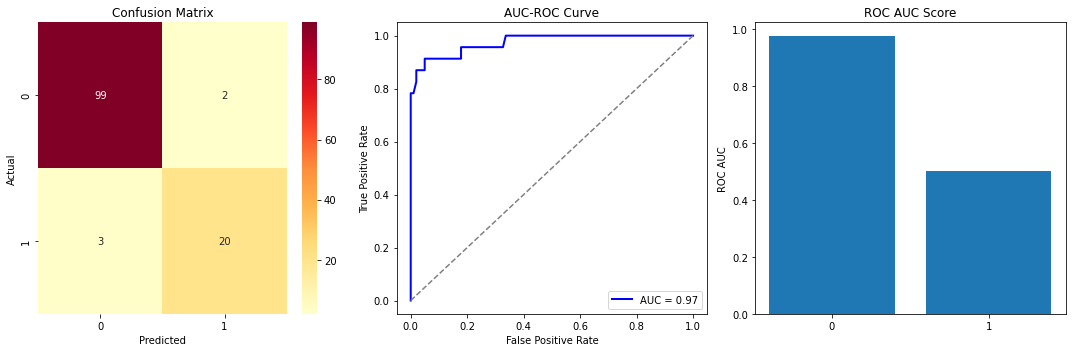

In [24]:
model_eval(rf, X_train_smote, y_train_smote, X_test, y_test)

In [25]:
#SVM
svm = SVC(random_state=42, probability=True)

Accuracy: 0.8871
Precision: 0.7143
Recall: 0.6522
F1-score: 0.6818
AUC-ROC: 0.9539


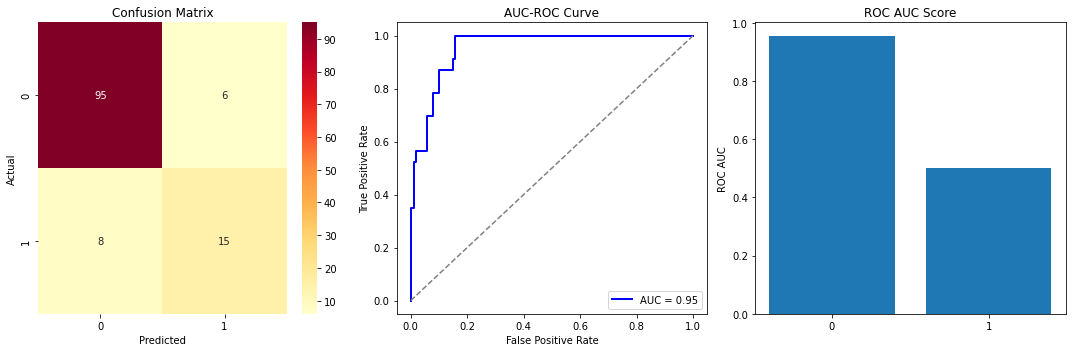

In [26]:
model_eval(svm, X_train_smote, y_train_smote, X_test, y_test)